<a href="https://colab.research.google.com/github/DeekshithaMede2007/C-programming/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
from keras.datasets import cifar10
cifar10

<module 'keras.datasets.cifar10' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/cifar10/__init__.py'>

In [5]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [9]:
#check the shape of the train and test
xtrain.shape

(50000, 32, 32, 3)

array([[[154, 179, 152],
        [159, 183, 157],
        [165, 189, 162],
        ...,
        [129, 161, 137],
        [125, 158, 133],
        [122, 155, 131]],

       [[156, 177, 152],
        [160, 180, 155],
        [163, 184, 159],
        ...,
        [118, 150, 126],
        [120, 152, 128],
        [118, 150, 126]],

       [[146, 169, 143],
        [130, 152, 126],
        [128, 151, 125],
        ...,
        [118, 150, 126],
        [112, 144, 120],
        [107, 139, 115]],

       ...,

       [[125, 146, 129],
        [126, 147, 127],
        [124, 146, 124],
        ...,
        [123, 141, 117],
        [126, 140, 118],
        [131, 144, 122]],

       [[125, 145, 127],
        [127, 148, 128],
        [125, 146, 124],
        ...,
        [120, 137, 119],
        [128, 142, 125],
        [129, 141, 125]],

       [[119, 136, 120],
        [121, 138, 119],
        [135, 153, 132],
        ...,
        [132, 148, 135],
        [136, 149, 137],
        [146, 157, 146]]], dtype=uint8)
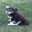

In [10]:
#look a first image in array
xtrain[70]#0 to 225

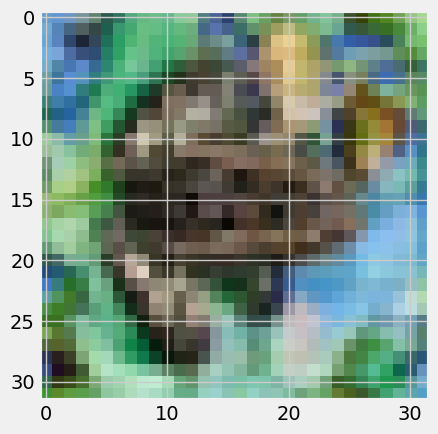

In [11]:
img0=plt.imshow(xtrain[200])

In [12]:
#get image label
lab1=ytrain[200]
print(lab1)

[6]


In [13]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
print('image class is:', classification[ytrain[200][0]])

image class is: frog


In [15]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [16]:
ytest_one_hot[40]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [17]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [18]:
#normalize the pixels values
xtrain=xtrain/225
xtest=xtest/255

In [19]:
xtrain[10]

array([[[0.23555556, 0.28888889, 0.23555556],
        [0.24      , 0.28      , 0.23111111],
        [0.24888889, 0.26666667, 0.22222222],
        ...,
        [0.20888889, 0.22666667, 0.22222222],
        [0.18222222, 0.2       , 0.19555556],
        [0.10666667, 0.12444444, 0.12      ]],

       [[0.20444444, 0.26222222, 0.18222222],
        [0.23555556, 0.27555556, 0.2       ],
        [0.24      , 0.26222222, 0.19555556],
        ...,
        [0.18666667, 0.20444444, 0.2       ],
        [0.17333333, 0.19111111, 0.18666667],
        [0.12444444, 0.14222222, 0.13777778]],

       [[0.2       , 0.26222222, 0.16888889],
        [0.22222222, 0.26666667, 0.18222222],
        [0.20444444, 0.23111111, 0.15111111],
        ...,
        [0.16888889, 0.18666667, 0.18222222],
        [0.16      , 0.17777778, 0.17333333],
        [0.12888889, 0.14666667, 0.14222222]],

       ...,

       [[0.31555556, 0.36888889, 0.29333333],
        [0.32888889, 0.36888889, 0.29333333],
        [0.35555556, 0

In [21]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling layer two
model.add(MaxPool2D(pool_size=(2,2)))
#flattening layer
model.add(Flatten())
#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))
#add a layer
model.add(Dense(500,activation='relu'))
#add dropout layer
model.add(Dropout(0.5))
#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))
#add a layer
model.add(Dense(250,activation='relu'))
#add a layer
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,824 (6.51 MB)

 Trainable params: 1,707,824 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=15,validation_split=0.2)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 412ms/step - accuracy: 0.1739 - loss: 2.1529 - val_accuracy: 0.4146 - val_loss: 1.6084
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 500ms/step - accuracy: 0.3897 - loss: 1.6289 - val_accuracy: 0.4647 - val_loss: 1.4531
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 355ms/step - accuracy: 0.4610 - loss: 1.4609 - val_accuracy: 0.5203 - val_loss: 1.3198
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 355ms/step - accuracy: 0.4998 - loss: 1.3749 - val_accuracy: 0.5260 - val_loss: 1.3430
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 93s 428ms/step - accuracy: 0.5333 - loss: 1.2891 - val_accuracy: 0.5724 - val_loss: 1.2034
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 402ms/step - accuracy: 0.5698 - loss: 1.2078 - val_accuracy: 0.5393 - val_loss: 1.2803
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 343ms/step - accuracy: 0.5858 - loss: 1.1679 - val_accuracy: 0.5443 - val_loss: 1.2651
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 361ms/step - accuracy: 0.6013 - loss: 1

In [25]:
model.evaluate(xtest,ytest_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6515 - loss: 0.9997


[1.0132700204849243, 0.6470999717712402]

In [27]:
cat=plt.imread('/content/Screenshot 2025-04-10 160013.png')

In [28]:
img=plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

In [29]:
#resize the image
#pip install scikit-image
from skimage import transform
resize=transform.resize(cat,(32,32,3))

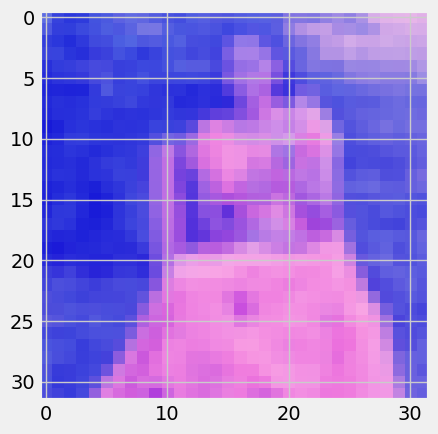

In [30]:
img=plt.imshow(resize)

In [31]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[0.31928954 0.00333209 0.31520718 0.06105572 0.16238752 0.04541335
  0.02063448 0.03119683 0.03517036 0.00631295]]


In [32]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp